In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
df.shape

(908, 13)

In [7]:
df.size

11804

In [8]:
df.ndim

2

In [9]:
df.duplicated().any()

True

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


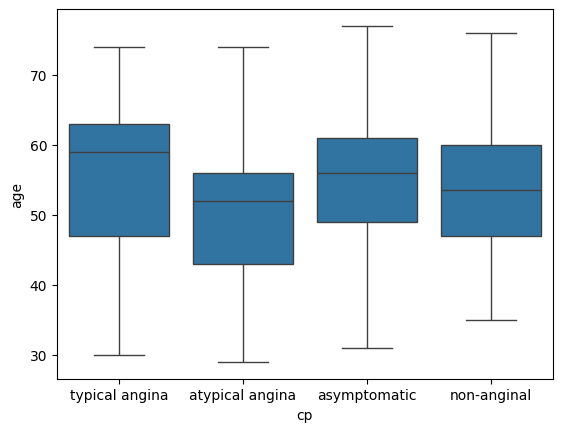

In [12]:
sns.boxplot(data=df, x='cp', y='age')
plt.show()

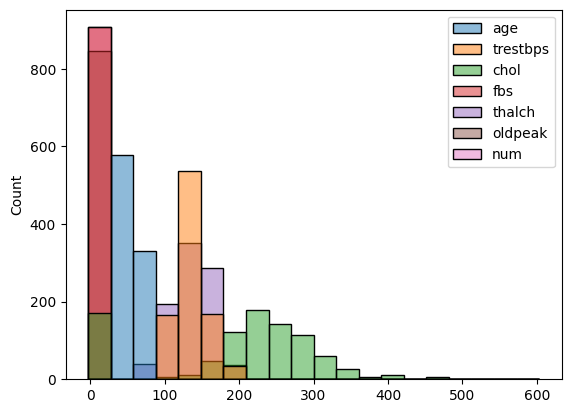

In [13]:
sns.histplot(df,bins=20)
plt.show()

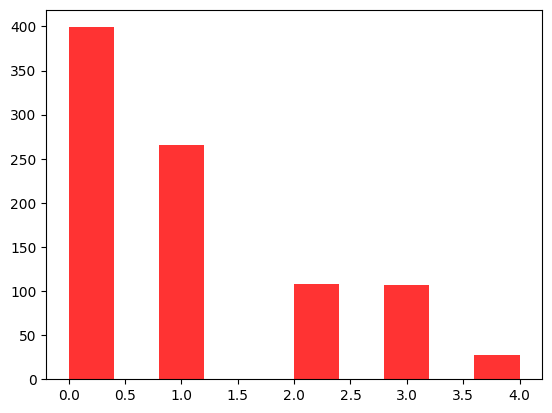

In [14]:
plt.hist(df['num'],bins = 10, color='red',alpha=0.8)
plt.show()

<Axes: xlabel='fbs'>

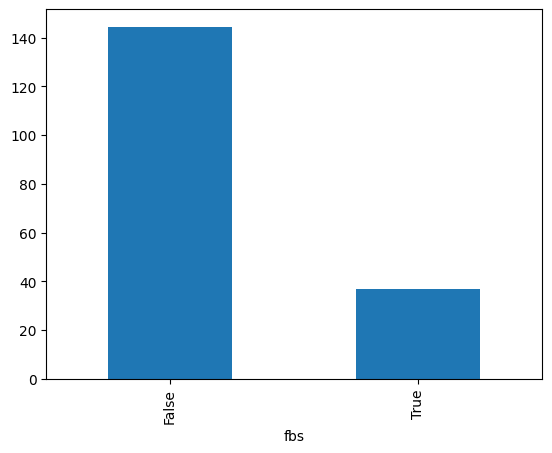

In [15]:
pd.crosstab(df['num'],df['fbs']).mean().plot(kind='bar')

<Axes: xlabel='num'>

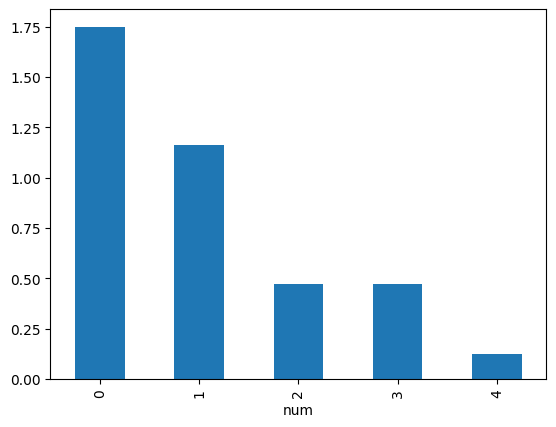

In [16]:
pd.crosstab(df['chol'],df['num']).mean().plot(kind='bar')

<Axes: xlabel='cp'>

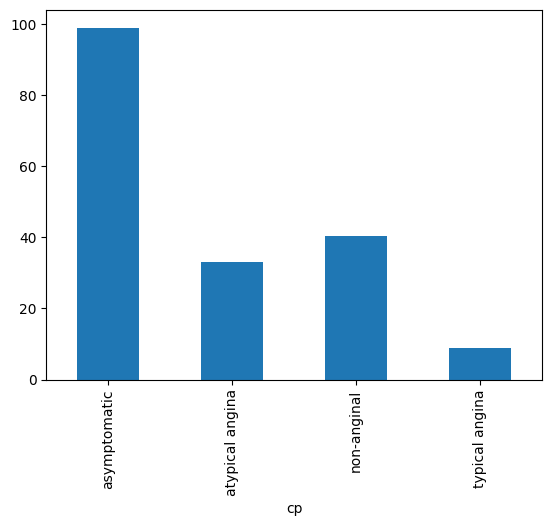

In [17]:
pd.crosstab(df['num'],df['cp']).mean().plot(kind='bar')

In [18]:
## feature engineering

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()
df["cp"]=label_encoder.fit_transform(df["cp"])
df["restecg"]=label_encoder.fit_transform(df["restecg"])
df["slope"]=label_encoder.fit_transform(df["slope"])
df["thal"]=label_encoder.fit_transform(df["thal"])
df["fbs"]=label_encoder.fit_transform(df["fbs"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,1,0,150,False,2.3,0,0,0
1,41,Male,1,135,203,0,1,132,False,0.0,1,0,0
2,57,Male,0,140,192,0,1,148,False,0.4,1,0,0
3,52,Male,3,118,186,0,0,190,False,0.0,1,0,0
4,57,Male,0,110,201,0,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,0,125,0,0,1,120,False,1.5,2,2,4
904,62,Male,0,166,170,0,2,120,True,3.0,1,2,4
905,56,Male,2,170,0,0,0,123,True,2.5,0,1,4
906,56,Male,2,144,208,1,2,105,TURE,NaN,0,0,4


In [21]:
df['sex'] = df['sex'].map({'Male':0,'Female':1})

In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,0,3,145,233,1,0,150,False,2.3,0,0,0
1,41,0,1,135,203,0,1,132,False,0.0,1,0,0
2,57,0,0,140,192,0,1,148,False,0.4,1,0,0
3,52,0,3,118,186,0,0,190,False,0.0,1,0,0
4,57,0,0,110,201,0,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,0,0,125,0,0,1,120,False,1.5,2,2,4
904,62,0,0,166,170,0,2,120,True,3.0,1,2,4
905,56,0,2,170,0,0,0,123,True,2.5,0,1,4
906,56,0,2,144,208,1,2,105,TURE,NaN,0,0,4


In [23]:
df=df.drop('exang',axis=1)

<Axes: >

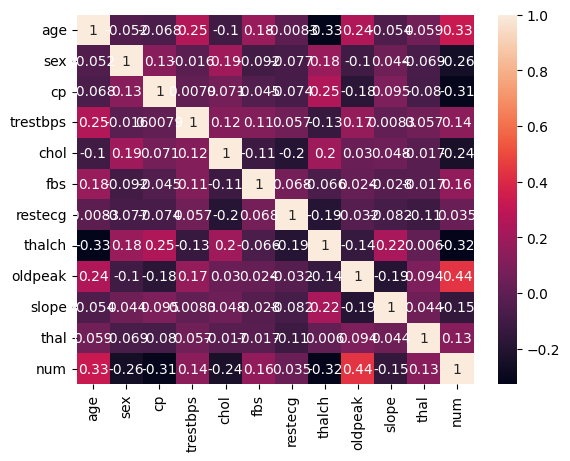

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
## decision TRUE classification

In [26]:
target=df[['num']]
feature=df.drop('num',axis=1)

In [27]:
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [28]:
feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal
0,63,0,3,145,233,1,0,150,2.3,0,0
1,41,0,1,135,203,0,1,132,0.0,1,0
2,57,0,0,140,192,0,1,148,0.4,1,0
3,52,0,3,118,186,0,0,190,0.0,1,0
4,57,0,0,110,201,0,1,126,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
903,53,0,0,125,0,0,1,120,1.5,2,2
904,62,0,0,166,170,0,2,120,3.0,1,2
905,56,0,2,170,0,0,0,123,2.5,0,1
906,56,0,2,144,208,1,2,105,NaN,0,0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
std_scaler = StandardScaler()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.80,random_state=100)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 11)
(182, 11)
(725, 1)
(182, 1)


In [33]:
from sklearn.impute import SimpleImputer

In [34]:
sim_imp= SimpleImputer(missing_values=np.nan,strategy='mean')

In [35]:
x_train = sim_imp.fit_transform(x_train)
y_train = sim_imp.fit_transform(y_train)
x_test = sim_imp.fit_transform(x_test)
y_test = sim_imp.fit_transform(y_test)

In [36]:
dec_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [37]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
y_pred= dec_tree.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.5274725274725275

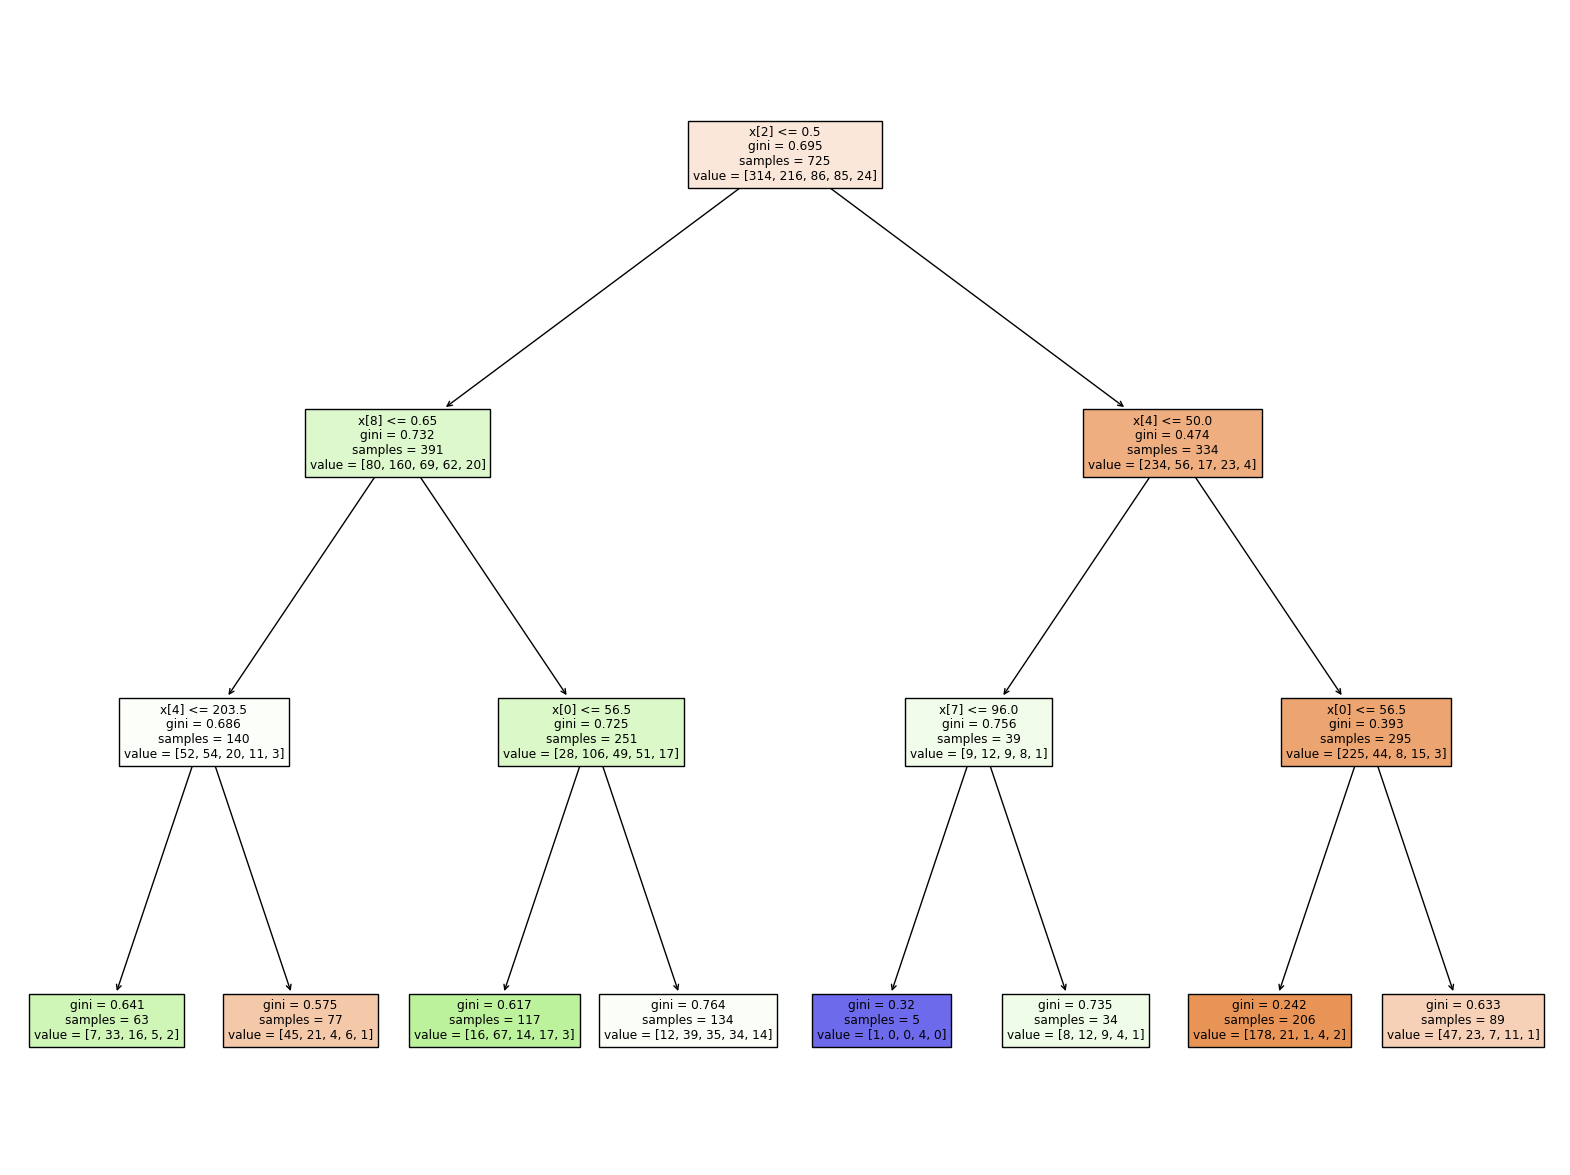

In [40]:
plt.figure(figsize=(20,15))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [41]:
params = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 2, 3, 4, 5]}

In [42]:
grid_search = GridSearchCV(dec_tree,params)

In [43]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [44]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [45]:
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)

In [46]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [47]:
y_pred = dec_tree.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.5384615384615384

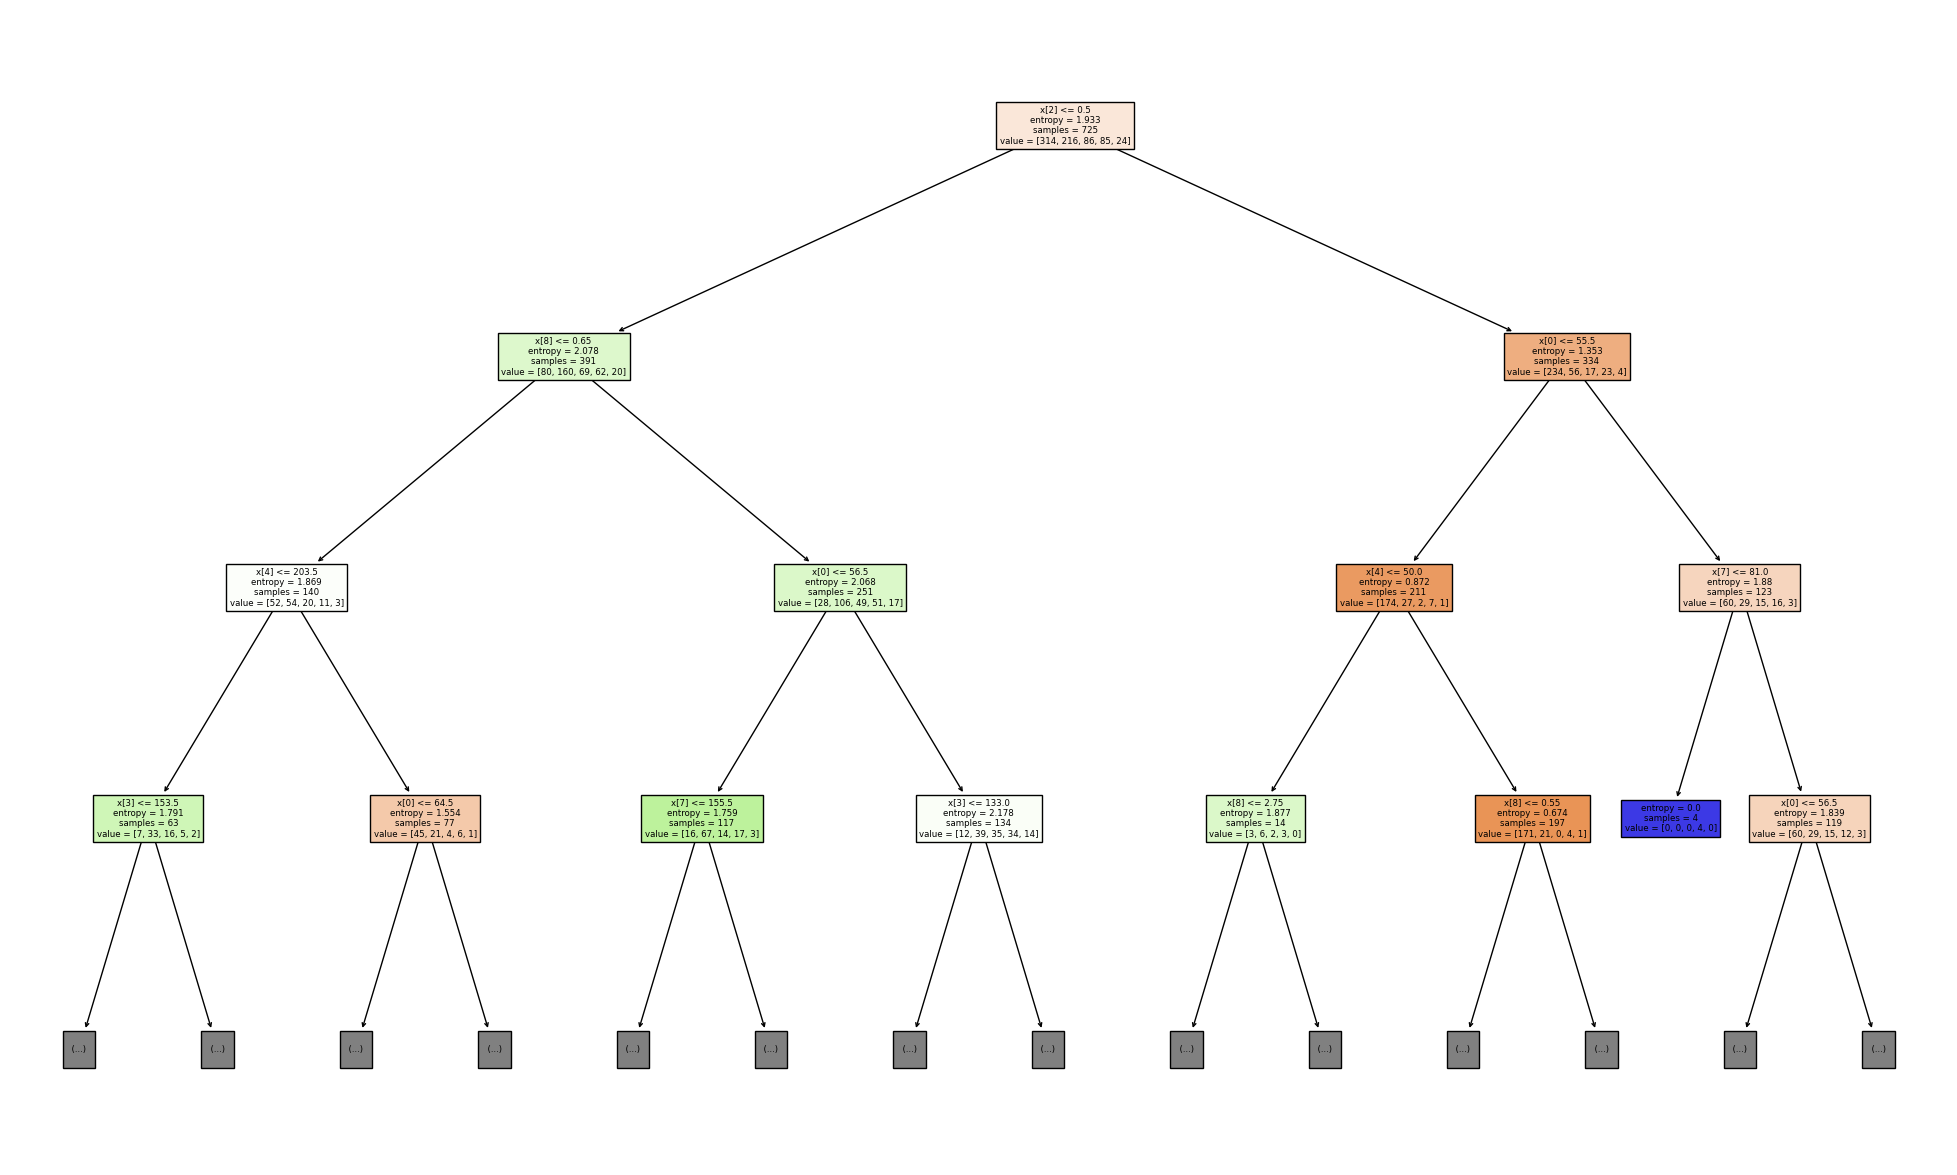

In [49]:
plt.figure(figsize=(25,15))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74        85
         1.0       0.40      0.47      0.43        49
         2.0       0.27      0.27      0.27        22
         3.0       0.20      0.05      0.07        22
         4.0       0.00      0.00      0.00         4

    accuracy                           0.54       182
   macro avg       0.31      0.32      0.30       182
weighted avg       0.49      0.54      0.51       182



In [52]:
confusion_matrix(y_test,y_pred)

array([[68, 13,  3,  1,  0],
       [22, 23,  4,  0,  0],
       [ 6,  7,  6,  3,  0],
       [ 2, 12,  7,  1,  0],
       [ 0,  2,  2,  0,  0]])

<Axes: >

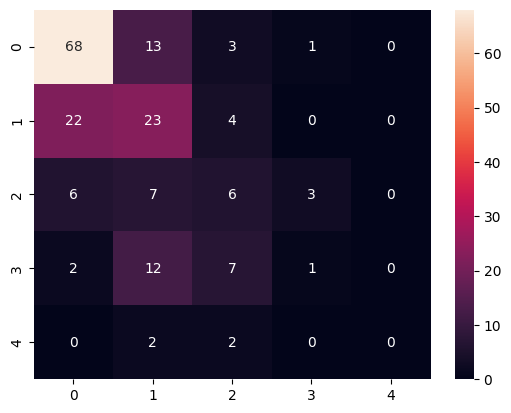

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [54]:
'''
Interview Questions:

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2.What is the difference between the Label encoding and One-hot encoding?

Answer1 :

The Decision Tree have several parameter but the main hyperparameter that effect the most are 'criterion','splitter' and 'max_depth',in samples split '

Criterion is used to make a choice between Gini and Entropy.

Splitter is used to make a choice between Best and Random.

Max_depth is used to give the deepth to the tree.

This specifies the minimum number of samples required to split an internal node

Answer2:

Label Encoder is a technique that is used to assign each category into a integer. The Label Encoder is prefered over the ordinal data.

One Hot Encoder is a technique where each category is represented as a binary. The OneHot Encoder is prefered over the nominal data.


'''

"\nInterview Questions:\n\n1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?\n\n2.What is the difference between the Label encoding and One-hot encoding?\n\nAnswer1 :\n\nThe Decision Tree have several parameter but the main hyperparameter that effect the most are 'criterion','splitter' and 'max_depth',in samples split '\n\nCriterion is used to make a choice between Gini and Entropy.\n\nSplitter is used to make a choice between Best and Random.\n\nMax_depth is used to give the deepth to the tree.\n\nThis specifies the minimum number of samples required to split an internal node\n\nAnswer2:\n\nLabel Encoder is a technique that is used to assign each category into a integer. The Label Encoder is prefered over the ordinal data.\n\nOne Hot Encoder is a technique where each category is represented as a binary. The OneHot Encoder is prefered over the nominal data.\n\n\n"